In [1]:
!pip install scikeras

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 6.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.4/13.4 MB 14.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 347.7/347.7 kB 15.1 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2
  Attempting uninstall: keras
    Found existing installation: keras 2.15.0
    Uninstalling keras-2.15.0:
      Successfully uninstalled keras-2.15.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.15.0 requires keras<2.16,>=2.15.0, but you have keras 3.4.1 which is incompatible.


In [2]:
# IMPORT NECESSARY LIBRARIES
import librosa
%matplotlib inline
import matplotlib.pyplot as plt
import librosa.display
from IPython.display import Audio
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
from keras import backend as K
from tensorflow.keras.models import Sequential, load_model
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import auc
from sklearn.metrics import roc_curve
import tensorflow as tf
from matplotlib.pyplot import specgram
import pandas as pd
from sklearn import datasets, metrics, model_selection, svm
from sklearn.metrics import confusion_matrix
# from sklearn.metrics import plot_roc_curve
from sklearn.metrics import RocCurveDisplay
from sklearn.datasets import make_classification
from sklearn.inspection import permutation_importance
import IPython.display as ipd  # To play sound in the notebook
import os # interface with underlying OS that python is running on
import sys
import soundfile as sf
import warnings
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import tensorflow.keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, AveragePooling1D
from tensorflow.keras.layers import Input, Flatten, Dropout, Activation, BatchNormalization, Dense, LSTM
from sklearn.model_selection import GridSearchCV
# from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from scikeras.wrappers import KerasClassifier, KerasRegressor
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.regularizers import l2
import seaborn as sns
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import classification_report
seed=7
np.random.seed(seed)
from matplotlib.pyplot import specgram
import glob
import IPython.display as ipd  # To play sound in the notebook
import pickle
# ignore warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [8]:
CaFE = "/content/drive/MyDrive/Dataset/Datasets/CaFE/"
# Run one example
dir_list = os.listdir(CaFE)
dir_list.remove('CaFE_192k_1.zip')
dir_list.remove('License.txt')
dir_list.remove('Readme.txt')
dir_list

['Colère', 'Dégoût', 'Joie', 'Neutre', 'Peur', 'Surprise', 'Tristesse']

In [13]:
emotion_map = {
    "C": "Anger",
    "D": "Disgust",
    "J": "Happiness",
    "N": "Neutral",
    "P": "Fear",
    "S": "Surprise",
    "T": "Sadness"
}

# Initialize a list to store rows of the DataFrame
data = []

# Loop through each directory and each file within the directory
for directory in dir_list:
    dir_path = os.path.join(CaFE, directory)
    sub_dir = os.listdir(dir_path)
    for dir in sub_dir:
        directory_path = os.path.join(dir_path, dir)
        if os.path.isdir(directory_path):
            for filename in os.listdir(directory_path):
                # print(filename)
                # Extract the emotion abbreviation from the filename
                emo_abb = filename.split('-')[1]
                # print(emo_abb)
                # Get the emotion name from the emotion_map dictionary
                emotion = emotion_map.get(emo_abb, 'Unknown')
                # Full path to the audio file
                file_path = os.path.join(directory_path, filename)
                # Append the emotion and file path to the data list
                data.append([emotion, file_path])

    #         break
    # break

# Create a DataFrame from the data list
df = pd.DataFrame(data, columns=['emotion', 'path'])

In [14]:
df.head(5)

,emotion,path
0,Anger,/content/drive/MyDrive/Dataset/Datasets/CaFE/C...
1,Anger,/content/drive/MyDrive/Dataset/Datasets/CaFE/C...
2,Anger,/content/drive/MyDrive/Dataset/Datasets/CaFE/C...
3,Anger,/content/drive/MyDrive/Dataset/Datasets/CaFE/C...
4,Anger,/content/drive/MyDrive/Dataset/Datasets/CaFE/C...


In [15]:
csv_path='/content/drive/MyDrive/Dataset/metadata/Data_path.csv"'
df.to_csv(csv_path, index=False)

In [16]:
ref = pd.read_csv(csv_path)
ref.head(10)

,emotion,path
0,Anger,/content/drive/MyDrive/Dataset/Datasets/CaFE/C...
1,Anger,/content/drive/MyDrive/Dataset/Datasets/CaFE/C...
2,Anger,/content/drive/MyDrive/Dataset/Datasets/CaFE/C...
3,Anger,/content/drive/MyDrive/Dataset/Datasets/CaFE/C...
4,Anger,/content/drive/MyDrive/Dataset/Datasets/CaFE/C...
5,Anger,/content/drive/MyDrive/Dataset/Datasets/CaFE/C...
6,Anger,/content/drive/MyDrive/Dataset/Datasets/CaFE/C...
7,Anger,/content/drive/MyDrive/Dataset/Datasets/CaFE/C...
8,Anger,/content/drive/MyDrive/Dataset/Datasets/CaFE/C...
9,Anger,/content/drive/MyDrive/Dataset/Datasets/CaFE/C...


In [17]:
# ENSURE GENDER,EMOTION, AND ACTOR COLUMN VALUES ARE CORRECT
pd.set_option('display.max_colwidth', None)
df.sample(100)

,emotion,path
120,Disgust,/content/drive/MyDrive/Dataset/Datasets/CaFE/Dégoût/Fort/03-D-2-1.aiff
177,Happiness,/content/drive/MyDrive/Dataset/Datasets/CaFE/Joie/Faible/06-J-1-4.aiff
222,Fear,/content/drive/MyDrive/Dataset/Datasets/CaFE/Peur/Faible/02-P-1-1.aiff
280,Fear,/content/drive/MyDrive/Dataset/Datasets/CaFE/Peur/Fort/05-P-2-5.aiff
378,Sadness,/content/drive/MyDrive/Dataset/Datasets/CaFE/Tristesse/Faible/04-T-1-1.aiff
...,...,...
101,Disgust,/content/drive/MyDrive/Dataset/Datasets/CaFE/Dégoût/Faible/05-D-1-6.aiff
245,Fear,/content/drive/MyDrive/Dataset/Datasets/CaFE/Peur/Faible/05-P-1-6.aiff
266,Fear,/content/drive/MyDrive/Dataset/Datasets/CaFE/Peur/Fort/03-P-2-3.aiff
430,Sadness,/content/drive/MyDrive/Dataset/Datasets/CaFE/Tristesse/Fort/06-T-2-5.aiff


<Axes: ylabel='count'>

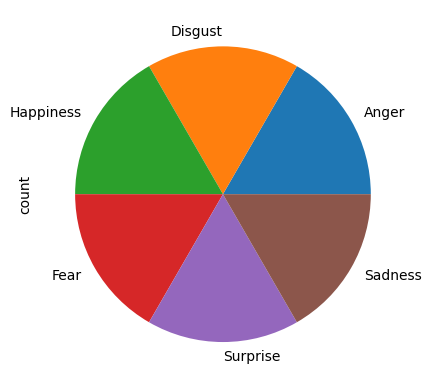

In [18]:
# LOOK AT DISTRIBUTION OF CLASSES
df.emotion.value_counts().plot(kind='pie')

In [19]:
!pip install resampy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 23.4 MB/s eta 0:00:00


In [20]:
import resampy
from resampy import resample
import librosa

In [21]:
# Note this takes a couple of minutes (~10 mins) as we're iterating over 4 datasets
df = pd.DataFrame(columns=['Features'])

# loop feature extraction over the entire dataset
counter=0
for index,path in enumerate(ref.path):
    X, sample_rate = librosa.load(path
                                  ,res_type='kaiser_fast'
                                  ,duration=3
                                  ,sr=44100
                                  ,offset=0.5
                                 )
    sample_rate = np.array(sample_rate)
    result = np.array([])

    # mean as the feature. Could do min and max etc as well.
    mfccs = np.mean(librosa.feature.mfcc(y=X,
                                        sr=sample_rate,
                                        n_mfcc=20),
                    axis=0)
    result=np.hstack((result, mfccs)) # stacking horizontally

    #get the mel-scaled spectrogram (ransform both the y-axis (frequency) to log scale, and the “color” axis (amplitude) to Decibels, which is kinda the log scale of amplitudes.)
    spectrogram = librosa.feature.melspectrogram(y=X, sr=sample_rate, n_mels=128,fmax=8000)
    db_spec = librosa.power_to_db(spectrogram)
    #temporally average spectrogram
    log_spectrogram = np.mean(db_spec, axis = 0)
    result=np.hstack((result, log_spectrogram)) # stacking horizontally

    # Chroma_stft
    stft = np.abs(librosa.stft(X))
    chroma_stft = np.mean(librosa.feature.chroma_stft(S=stft, sr=sample_rate).T, axis=0)
    result = np.hstack((result, chroma_stft)) # stacking horizontally

    # Root Mean Square Value
    rms = np.mean(librosa.feature.rms(y=X).T, axis=0)
    result = np.hstack((result, rms)) # stacking horizontally

    df.loc[counter] = [result]
    counter=counter+1


# Check a few records to make sure its processed successfully
print(len(df))
df.head()

432


,Features
0,"[-37.79716873168945, -35.08191680908203, -35.09666061401367, -35.87389373779297, -34.49647521972656, -33.70586013793945, -36.47475814819336, -35.894020080566406, -34.241233825683594, -34.20204162597656, -34.18036651611328, -33.48822784423828, -34.304710388183594, -28.610681533813477, -23.603540420532227, -22.06032371520996, -21.33791732788086, -20.68866729736328, -20.978242874145508, -21.670541763305664, -22.477909088134766, -24.231338500976562, -27.684072494506836, -27.891931533813477, -26.90468406677246, -26.80965805053711, -27.683324813842773, -28.80397605895996, -28.937423706054688, -28.4193058013916, -26.176525115966797, -27.99312400817871, -30.171672821044922, -31.500564575195312, -31.037731170654297, -31.64736557006836, -30.385650634765625, -27.41585350036621, -23.799579620361328, -23.29142951965332, -24.478557586669922, -23.704750061035156, -22.066640853881836, -22.246822357177734, -21.256122589111328, -20.936738967895508, -22.07466697692871, -22.51913833618164, -21.426372528076172, -21.80941390991211, -21.482433319091797, -19.8245849609375, -19.276477813720703, -21.323009490966797, -26.193307876586914, -27.65768051147461, -26.868066787719727, -27.9612979888916, -28.93265724182129, -31.51312828063965, -31.467182159423828, -32.457279205322266, -32.974891662597656, -31.705474853515625, -31.422420501708984, -32.42980194091797, -27.255321502685547, -24.6552791595459, -22.535924911499023, -24.069772720336914, -27.714269638061523, -26.238739013671875, -24.145030975341797, -24.11638641357422, -24.734970092773438, -23.54140281677246, -23.75901222229004, -23.627826690673828, -20.87806510925293, -20.011974334716797, -19.041553497314453, -19.45458984375, -21.379840850830078, -21.561382293701172, -22.145957946777344, -22.147247314453125, -22.1080322265625, -20.915231704711914, -21.53003692626953, -21.210433959960938, -19.093650817871094, -18.840700149536133, -18.971097946166992, -18.618423461914062, -18.921661376953125, -18.773609161376953, -18.884357452392578, -18.712665557861328, -18.68106460571289, -18.266281127929688, ...]"
1,"[-34.970333099365234, -33.97959899902344, -32.946006774902344, -32.828651428222656, -33.68539047241211, -32.73653030395508, -32.354270935058594, -32.93527603149414, -33.90918731689453, -34.84534454345703, -34.86615753173828, -34.25788116455078, -34.535404205322266, -35.89539337158203, -34.38308334350586, -32.47983932495117, -31.75588607788086, -32.105125427246094, -31.473575592041016, -33.35068893432617, -32.81840515136719, -32.85637664794922, -33.18003845214844, -33.18467712402344, -33.584571838378906, -32.91416549682617, -33.61896514892578, -34.22148895263672, -33.211509704589844, -32.21333312988281, -33.43138122558594, -35.760414123535156, -35.61872100830078, -33.646644592285156, -33.02964401245117, -33.9477653503418, -33.17802810668945, -34.48264694213867, -34.98294448852539, -34.79901123046875, -33.09363555908203, -32.96240997314453, -33.95806121826172, -32.96991729736328, -31.86751365661621, -32.204444885253906, -33.529029846191406, -34.02745819091797, -33.226318359375, -32.56726837158203, -31.462772369384766, -32.11433792114258, -31.61606788635254, -32.57142639160156, -32.4924430847168, -32.5781364440918, -32.423423767089844, -32.518531799316406, -32.96746063232422, -34.402427673339844, -34.260597229003906, -34.423362731933594, -34.293216705322266, -33.98380661010742, -34.69279479980469, -34.14630889892578, -32.906272888183594, -31.2830810546875, -30.867023468017578, -30.25266456604004, -24.18480682373047, -19.150165557861328, -17.528310775756836, -17.47124481201172, -19.316518783569336, -18.860477447509766, -20.00530433654785, -20.089183807373047, -19.393796920776367, -19.087146759033203, -19.225284576416016, -18.91202735900879, -20.489421844482422, -18.405534744262695, -18.25704574584961, -18.17086410522461, -18.082189559936523, -18.08323860168457, -17.38961410522461, -17.624473571777344, -17.324481964111328, -17.141902923583984, -17.52190399169922, -18.594947814941406, -18.55683326

In [22]:
# Now extract the mean bands to its own feature columns
df = pd.concat([ref,pd.DataFrame(df['Features'].values.tolist())],axis=1)
df[:5]

,emotion,path,0,1,2,3,4,5,6,7,...,521,522,523,524,525,526,527,528,529,530
0,Anger,/content/drive/MyDrive/Dataset/Datasets/CaFE/Colère/Faible/01-C-1-1.aiff,-37.797169,-35.081917,-35.096661,-35.873894,-34.496475,-33.705860,-36.474758,-35.894020,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Anger,/content/drive/MyDrive/Dataset/Datasets/CaFE/Colère/Faible/01-C-1-2.aiff,-34.970333,-33.979599,-32.946007,-32.828651,-33.685390,-32.736530,-32.354271,-32.935276,...,0.725673,0.690440,0.670443,0.664585,0.680411,0.693762,0.705577,0.698737,0.686265,0.008152
2,Anger,/content/drive/MyDrive/Dataset/Datasets/CaFE/Colère/Faible/01-C-1-3.aiff,-37.031685,-33.779858,-33.099461,-33.224453,-33.540810,-32.367065,-32.530617,-32.384323,...,0.745717,0.736878,0.739346,0.734786,0.770891,0.754668,0.745578,0.734867,0.727426,0.005142
3,Anger,/content/drive/MyDrive/Dataset/Datasets/CaFE/Colère/Faible/01-C-1-4.aiff,-29.561590,-29.876907,-33.257637,-35.547310,-32.789246,-31.019281,-31.285751,-31.741947,...,0.702744,0.653581,0.633298,0.641166,0.704707,0.717533,0.703930,0.673083,0.691849,0.009550
4,Anger,/content/drive/MyDrive/Dataset/Datasets/CaFE/Colère/Faible/01-C-1-5.aiff,-32.450966,-31.922211,-32.942192,-32.223881,-31.686600,-33.113426,-33.499275,-33.693981,...,0.755799,0.726947,0.718343,0.683345,0.688069,0.718520,0.767021,0.784543,0.799868,0.006569


In [23]:
# replace NA with 0
df=df.fillna(0)
print(df.shape)
df[:5]

(432, 533)


,emotion,path,0,1,2,3,4,5,6,7,...,521,522,523,524,525,526,527,528,529,530
0,Anger,/content/drive/MyDrive/Dataset/Datasets/CaFE/Colère/Faible/01-C-1-1.aiff,-37.797169,-35.081917,-35.096661,-35.873894,-34.496475,-33.705860,-36.474758,-35.894020,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,Anger,/content/drive/MyDrive/Dataset/Datasets/CaFE/Colère/Faible/01-C-1-2.aiff,-34.970333,-33.979599,-32.946007,-32.828651,-33.685390,-32.736530,-32.354271,-32.935276,...,0.725673,0.690440,0.670443,0.664585,0.680411,0.693762,0.705577,0.698737,0.686265,0.008152
2,Anger,/content/drive/MyDrive/Dataset/Datasets/CaFE/Colère/Faible/01-C-1-3.aiff,-37.031685,-33.779858,-33.099461,-33.224453,-33.540810,-32.367065,-32.530617,-32.384323,...,0.745717,0.736878,0.739346,0.734786,0.770891,0.754668,0.745578,0.734867,0.727426,0.005142
3,Anger,/content/drive/MyDrive/Dataset/Datasets/CaFE/Colère/Faible/01-C-1-4.aiff,-29.561590,-29.876907,-33.257637,-35.547310,-32.789246,-31.019281,-31.285751,-31.741947,...,0.702744,0.653581,0.633298,0.641166,0.704707,0.717533,0.703930,0.673083,0.691849,0.009550
4,Anger,/content/drive/MyDrive/Dataset/Datasets/CaFE/Colère/Faible/01-C-1-5.aiff,-32.450966,-31.922211,-32.942192,-32.223881,-31.686600,-33.113426,-33.499275,-33.693981,...,0.755799,0.726947,0.718343,0.683345,0.688069,0.718520,0.767021,0.784543,0.799868,0.006569


In [24]:
# Split between train and test
X_train, X_test, y_train, y_test = train_test_split(df.drop(['path','emotion'],axis=1)
                                                    , df.emotion
                                                    , test_size=0.20
                                                    , shuffle=True
                                                    , random_state=42
                                                   )

# Lets see how the data present itself before normalisation
X_train[150:160]

,0,1,2,3,4,5,6,7,8,9,...,521,522,523,524,525,526,527,528,529,530
301,-33.448853,-32.107430,-32.338310,-32.209568,-31.415497,-30.875324,-31.512501,-32.299015,-32.217796,-32.312378,...,0.708282,0.683575,0.698099,0.682196,0.667375,0.673507,0.684135,0.733782,0.772281,0.002558
327,-33.016819,-32.245377,-32.395897,-33.455620,-32.232841,-32.210339,-32.326649,-32.976219,-33.969143,-33.210659,...,0.490002,0.508466,0.544610,0.618755,0.667179,0.681979,0.642018,0.590770,0.548992,0.011119
183,-31.234674,-31.623636,-32.576672,-33.192654,-32.973644,-32.434177,-32.468128,-34.490383,-33.758369,-33.077477,...,0.585546,0.636225,0.650582,0.709660,0.747964,0.727573,0.613882,0.543154,0.539327,0.008953
281,-29.833933,-30.306637,-29.548019,-28.739437,-28.638031,-30.285080,-29.649984,-29.495646,-29.831232,-29.749182,...,0.742208,0.690494,0.620442,0.593139,0.584691,0.604390,0.625510,0.649724,0.648277,0.044270
307,-25.657364,-23.383736,-23.600613,-24.965199,-23.463190,-22.379847,-23.828114,-25.584890,-23.503269,-22.977425,...,0.649732,0.620981,0.614635,0.597479,0.576921,0.600599,0.669989,0.723142,0.700522,0.022601
340,-32.847450,-31.573267,-29.763279,-29.945169,-30.277771,-30.577393,-30.664759,-31.664185,-33.138229,-32.103519,...,0.687442,0.677687,0.700941,0.712219,0.750821,0.755512,0.730997,0.728484,0.752610,0.004935
387,-33.024368,-32.051022,-31.464554,-29.905716,-30.323254,-30.256643,-32.069664,-32.618134,-32.454296,-30.905584,...,0.632866,0.647197,0.699193,0.743946,0.783381,0.708658,0.636041,0.620726,0.650632,0.006651
129,-30.904404,-29.585535,-29.515829,-29.143707,-29.172867,-30.768879,-30.019749,-29.180948,-27.700354,-27.899891,...,0.547145,0.470779,0.459223,0.447092,0.486582,0.548940,0.607808,0.642171,0.658678,0.008830
38,-30.177729,-30.011841,-30.359070,-30.073551,-28.917027,-29.005899,-29.208172,-29.294407,-29.427618,-30.114344,...,0.600587,0.586956,0.562277,0.551301,0.607191,0.578584,0.527982,0.513865,0.500935,0.032558
11,-30.526493,-31.277109,-33.931938,-32.097912,-31.873484,-33.359768,-33.555862,-32.448940,-30.594372,-32.698215,...,0.593641,0.584146,0.587432,0.624410,0.622270,0.593757,0.617849,0.674519,0.686397,0.012398


In [25]:

# NORMALIZE DATA
mean = np.mean(X_train, axis=0)
std = np.std(X_train, axis=0)
X_train = (X_train - mean)/std
X_test = (X_test - mean)/std
# TURN DATA INTO ARRAYS FOR KERAS
X_train = np.array(X_train)
y_train = np.array(y_train)
X_test = np.array(X_test)
y_test = np.array(y_test)
# ONE HOT ENCODE THE TARGET
# CNN REQUIRES INPUT AND OUTPUT ARE NUMBERS
lb = LabelEncoder()
y_train = to_categorical(lb.fit_transform(y_train))
y_test = to_categorical(lb.fit_transform(y_test))
print(y_test[0:10])
# RESHAPE DATA TO INCLUDE 3D TENSOR
X_train = X_train[:,:,np.newaxis]
X_test = X_test[:,:,np.newaxis]

print(X_train.shape)
print(X_test.shape)

[[0. 0. 0. 0. 1. 0.]
 [0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0.]
 [1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0.]
 [0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0. 0.]]
(345, 531, 1)
(87, 531, 1)


In [26]:
lb.classes_

array(['Anger', 'Disgust', 'Fear', 'Happiness', 'Sadness', 'Surprise'],
      dtype=object)

In [27]:
# ITERATE OVER ALL AUDIO FILES AND EXTRACT LOG MEL SPECTROGRAM MEAN VALUES INTO DF FOR MODELING
import pandas as pd
df_mel = pd.DataFrame(columns=['mel_spectrogram'])

counter=0

for index,path in enumerate(ref.path):
    X, sample_rate = librosa.load(path, res_type='kaiser_fast',duration=3,sr=44100,offset=0.5)

    #get the mel-scaled spectrogram (ransform both the y-axis (frequency) to log scale, and the “color” axis (amplitude) to Decibels, which is kinda the log scale of amplitudes.)
    spectrogram = librosa.feature.melspectrogram(y=X, sr=sample_rate, n_mels=128,fmax=8000)
    db_spec = librosa.power_to_db(spectrogram)
    #temporally average spectrogram
    log_spectrogram = np.mean(db_spec, axis = 0)

    # Mel-frequency cepstral coefficients (MFCCs)
#     mfcc = librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=13)
#     mfcc=np.mean(mfcc,axis=0)

    # compute chroma energy (pertains to 12 different pitch classes)
#     chroma = librosa.feature.chroma_stft(y=X, sr=sample_rate)
#     chroma = np.mean(chroma, axis = 0)

    # compute spectral contrast
#     contrast = librosa.feature.spectral_contrast(y=X, sr=sample_rate)
#     contrast = np.mean(contrast, axis= 0)

    # compute zero-crossing-rate (zcr:the zcr is the rate of sign changes along a signal i.e.m the rate at
#     which the signal changes from positive to negative or back - separation of voiced andunvoiced speech.)
#     zcr = librosa.feature.zero_crossing_rate(y=X)
#     zcr = np.mean(zcr, axis= 0)

    df_mel.loc[counter] = [log_spectrogram]
    counter=counter+1

print(len(df_mel))
df_mel.head()

432


,mel_spectrogram
0,"[-74.35532, -73.725685, -73.62462, -73.57471, -73.72598, -73.56958, -74.0669, -73.906906, -73.67693, -73.289734, -70.549965, -64.52417, -59.465508, -54.855145, -48.79907, -45.196907, -44.287846, -44.611824, -45.16401, -44.012592, -43.65945, -43.80293, -45.927475, -46.2235, -45.206062, -44.102272, -43.466614, -43.226444, -41.956837, -40.29666, -39.770985, -43.48391, -51.120754, -55.977737, -57.917534, -58.2033, -51.56555, -44.55824, -42.005787, -38.829556, -36.07151, -34.40455, -33.515724, -31.840212, -31.201157, -35.29339, -40.057224, -42.46825, -44.152306, -44.34343, -43.782524, -42.798763, -41.9772, -41.671474, -42.26781, -43.476643, -45.15434, -45.65541, -46.813805, -48.760376, -50.205727, -50.681255, -51.033585, -52.25492, -50.857304, -46.015198, -41.06983, -37.64404, -36.937283, -39.25322, -43.548775, -45.11456, -42.56228, -41.596596, -42.037804, -40.793068, -42.658882, -44.092274, -40.803535, -37.534576, -36.9373, -39.246597, -40.96582, -40.79177, -40.02912, -39.63049, -39.59417, -39.7197, -39.324165, -38.920704, -37.81801, -36.32406, -36.135376, -35.446674, -35.698826, -36.116566, -35.647446, -34.92809, -33.15955, -32.416084, ...]"
1,"[-69.526566, -69.181915, -69.11391, -69.24587, -69.171524, -69.06556, -69.15758, -69.0888, -69.1659, -69.3869, -69.27806, -69.33145, -69.49895, -69.203636, -68.926414, -68.014404, -67.590195, -68.65597, -68.822845, -69.154205, -69.237045, -69.33322, -69.441635, -69.403725, -69.44002, -69.34006, -69.36149, -69.35001, -69.27922, -69.18059, -69.34763, -69.67917, -69.65019, -69.12542, -69.0762, -69.34534, -69.3402, -69.190765, -69.3069, -69.45517, -68.98233, -68.93848, -69.12333, -68.63824, -68.393456, -68.15681, -68.14352, -66.59715, -64.47653, -61.99235, -60.867252, -62.311546, -64.03646, -65.08742, -65.89586, -65.6876, -65.71005, -65.81351, -67.50458, -68.90845, -69.01073, -69.05095, -69.13308, -69.336205, -69.18311, -68.96631, -68.7779, -68.454185, -68.07276, -67.785614, -50.31082, -40.463478, -40.001293, -40.68734, -42.190853, -42.98936, -44.971336, -45.08279, -43.751183, -42.521362, -41.06361, -40.500202, -39.97134, -39.28933, -38.409794, -36.68745, -35.90755, -35.390377, -35.187523, -36.691845, -37.078606, -38.400673, -39.934547, -40.348083, -40.529102, -40.56826, -39.89992, -38.08801, -38.111473, -40.414932, ...]"
2,"[-72.70084, -72.50672, -72.31154, -72.22031, -72.26621, -72.28818, -72.43928, -72.48223, -72.54424, -72.622734, -72.49833, -72.296486, -72.30807, -72.38145, -72.405815, -72.13415, -70.937744, -68.23017, -71.14074, -72.43721, -72.36877, -72.43244, -72.52646, -72.546524, -72.441185, -72.41514, -72.697464, -72.655655, -72.37791, -72.291794, -72.42049, -72.38313, -72.49049, -72.375984, -72.265915, -72.40403, -72.25991, -72.0464, -72.25565, -72.44478, -72.49792, -72.55153, -72.190834, -72.37181, -72.36561, -72.33621, -72.294754, -71.63994, -71.30566, -71.658714, -71.07552, -69.06145, -66.97415, -65.56623, -64.62941, -66.107864, -68.92014, -71.20315, -72.11502, -72.16194, -71.82678, -71.496254, -59.148075, -38.126617, -30.450424, -27.430655, -29.190668, -31.111578, -33.134037, -36.267345, -38.727585, -41.625282, -42.42146, -43.113163, -45.756245, -48.06696, -49.105286, -50.359512, -50.918243, -49.6434, -46.230682, -40.470894, -35.691666, -31.154741, -27.40517, -24.566555, -23.569338, -24.05554, -24.86683, -26.128195, -26.168428, -25.735737, -26.81678, -27.225616, -27.151312, -30.31727, -33.554028, -36.6726, -40.23561, -43.790977, ...]"
3,"[-64.05319, -64.18201, -64.61928, -64.8807, -64.60097, -64.190544, -64.21485, -64.36169, -64.509514, -64.65826, -63.957394, -63.89613, -64.32954, -62.183277, -62.44371, -58.498856, -46.85111, -39.008396, -30.22115, -25.007, -21.800308, -19.22994, -19.33319, -20.694588, -20.40813, -19.215586, -19.044403, -20.440844, -22.653936, -24.018768, -24.091223, -21.789598, -22.105883, -27.676899, -36.55433, -44.23906, -48.100803, -51.312088, -53.68597, -55.44583, -57.947075, -59.851376, -40.8394, -31.565662, -26.726048, -22.12796, -21.

In [28]:
# Now extract the mean bands to its own feature columns
df = pd.concat([ref,pd.DataFrame(df_mel['mel_spectrogram'].values.tolist())],axis=1)
df[:5]

,emotion,path,0,1,2,3,4,5,6,7,...,249,250,251,252,253,254,255,256,257,258
0,Anger,/content/drive/MyDrive/Dataset/Datasets/CaFE/Colère/Faible/01-C-1-1.aiff,-74.355324,-73.725685,-73.624619,-73.574707,-73.725983,-73.569580,-74.066902,-73.906906,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Anger,/content/drive/MyDrive/Dataset/Datasets/CaFE/Colère/Faible/01-C-1-2.aiff,-69.526566,-69.181915,-69.113907,-69.245872,-69.171524,-69.065559,-69.157578,-69.088799,...,-25.900444,-25.501810,-25.328730,-25.043015,-26.163950,-27.037634,-28.943907,-34.345955,-41.520523,-42.038826
2,Anger,/content/drive/MyDrive/Dataset/Datasets/CaFE/Colère/Faible/01-C-1-3.aiff,-72.700844,-72.506721,-72.311539,-72.220306,-72.266212,-72.288177,-72.439278,-72.482231,...,-38.701180,-41.500946,-45.431301,-54.741261,-59.676331,-61.973759,-63.914291,-65.528496,-67.224731,-68.872673
3,Anger,/content/drive/MyDrive/Dataset/Datasets/CaFE/Colère/Faible/01-C-1-4.aiff,-64.053192,-64.182007,-64.619278,-64.880699,-64.600967,-64.190544,-64.214851,-64.361687,...,-55.985008,-56.033882,-55.948242,-56.508011,-56.365566,-56.568123,-56.656307,-56.408882,-56.664394,-57.591312
4,Anger,/content/drive/MyDrive/Dataset/Datasets/CaFE/Colère/Faible/01-C-1-5.aiff,-73.076263,-72.974205,-73.104607,-73.092163,-73.095634,-73.250839,-73.181442,-72.227661,...,-59.269444,-58.565208,-57.897930,-58.891647,-59.606617,-59.319107,-59.525188,-60.196270,-60.577671,-61.757462


In [29]:
# Split between train and test
X_train, X_test, y_train, y_test = train_test_split(df.drop(['path','emotion'],axis=1)
                                                    , df.emotion
                                                    , test_size=0.20
                                                    , shuffle=True
                                                    , random_state=42
                                                   )

# Lets see how the data present itself before normalisation
X_train[150:160]

,0,1,2,3,4,5,6,7,8,9,...,249,250,251,252,253,254,255,256,257,258
301,-73.324379,-72.254616,-72.548058,-72.878426,-72.326263,-71.994423,-72.159546,-72.454079,-72.611420,-72.103508,...,-74.465439,-74.541237,-74.644646,-74.123878,-74.292633,-74.623413,-74.342285,-74.217316,-74.411407,-75.596199
327,-62.453529,-62.295441,-62.312439,-62.428974,-62.317108,-62.348259,-62.367214,-62.453766,-62.542645,-62.464928,...,-41.866013,-42.216358,-44.277973,-49.263721,-55.706188,-58.061764,-58.851536,-58.826794,-58.590919,-58.574818
183,-64.085487,-64.026649,-64.188705,-64.251526,-64.212173,-64.186722,-64.225693,-64.407471,-64.315102,-64.038048,...,-45.957157,-50.566441,-53.827744,-56.197903,-57.578053,-58.811253,-52.417484,-35.370762,-25.716707,-21.163023
281,-53.767391,-53.802689,-53.736618,-53.676434,-53.669411,-53.800907,-53.755009,-53.731186,-53.765045,-53.769566,...,-18.787523,-18.603245,-16.496613,-14.973886,-15.429981,-16.758932,-18.725449,-19.447063,-21.154097,-22.373316
307,-54.604599,-54.169193,-53.781227,-53.731640,-53.642208,-52.985352,-52.765503,-53.236309,-52.729015,-52.461784,...,-54.326424,-54.552895,-54.139145,-53.970123,-53.779434,-53.841354,-54.084179,-54.462898,-54.194523,-54.089176
340,-67.390442,-65.920868,-66.319351,-67.307831,-67.319046,-67.805779,-68.367348,-68.514465,-68.989243,-69.177612,...,-68.680000,-68.929764,-69.111504,-68.824493,-68.871544,-68.694145,-68.675964,-68.965195,-68.994789,-69.342438
387,-68.047295,-67.735527,-67.716049,-67.660858,-67.785721,-67.464157,-67.679024,-67.917831,-67.758690,-67.533966,...,-37.648403,-37.715359,-36.939068,-37.180099,-37.883736,-37.781853,-38.475193,-39.495449,-37.567875,-34.484928
129,-54.902527,-53.120319,-53.371948,-54.181335,-54.292324,-54.257259,-54.738674,-55.666161,-56.641899,-57.146652,...,-31.213123,-27.858532,-28.509571,-28.636955,-28.179546,-27.719585,-27.478516,-27.906195,-26.095455,-24.386003
38,-54.091034,-54.082684,-54.111458,-54.090271,-53.977974,-54.018806,-54.032673,-54.034218,-54.029785,-54.095188,...,-26.106874,-28.579889,-30.876909,-34.094070,-38.597424,-43.268986,-48.357948,-50.656166,-52.233177,-52.863197
11,-63.872971,-63.949654,-64.330490,-64.079239,-64.104668,-64.292885,-64.317612,-64.166862,-63.972542,-64.198891,...,-26.143127,-27.063313,-29.863386,-33.989929,-36.307281,-36.995422,-37.177929,-30.709986,-24.123863,-20.295078


In [30]:

# NORMALIZE DATA
mean = np.mean(X_train, axis=0)
std = np.std(X_train, axis=0)
X_train = (X_train - mean)/std
X_test = (X_test - mean)/std
# TURN DATA INTO ARRAYS FOR KERAS
X_train = np.array(X_train)
y_train = np.array(y_train)
X_test = np.array(X_test)
y_test = np.array(y_test)
# ONE HOT ENCODE THE TARGET
# CNN REQUIRES INPUT AND OUTPUT ARE NUMBERS
lb = LabelEncoder()
y_train = to_categorical(lb.fit_transform(y_train))
y_test = to_categorical(lb.fit_transform(y_test))
print(y_test[0:10])
# RESHAPE DATA TO INCLUDE 3D TENSOR
X_train = X_train[:,:,np.newaxis]
X_test = X_test[:,:,np.newaxis]

print(X_train.shape)
print(X_test.shape)

[[0. 0. 0. 0. 1. 0.]
 [0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0.]
 [1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0.]
 [0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0. 0.]]
(345, 259, 1)
(87, 259, 1)


In [31]:
data_path = pd.concat([df], axis = 0)
data_path.to_csv(csv_path,index=False)
data_path.head()

,emotion,path,0,1,2,3,4,5,6,7,...,249,250,251,252,253,254,255,256,257,258
0,Anger,/content/drive/MyDrive/Dataset/Datasets/CaFE/Colère/Faible/01-C-1-1.aiff,-74.355324,-73.725685,-73.624619,-73.574707,-73.725983,-73.569580,-74.066902,-73.906906,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Anger,/content/drive/MyDrive/Dataset/Datasets/CaFE/Colère/Faible/01-C-1-2.aiff,-69.526566,-69.181915,-69.113907,-69.245872,-69.171524,-69.065559,-69.157578,-69.088799,...,-25.900444,-25.501810,-25.328730,-25.043015,-26.163950,-27.037634,-28.943907,-34.345955,-41.520523,-42.038826
2,Anger,/content/drive/MyDrive/Dataset/Datasets/CaFE/Colère/Faible/01-C-1-3.aiff,-72.700844,-72.506721,-72.311539,-72.220306,-72.266212,-72.288177,-72.439278,-72.482231,...,-38.701180,-41.500946,-45.431301,-54.741261,-59.676331,-61.973759,-63.914291,-65.528496,-67.224731,-68.872673
3,Anger,/content/drive/MyDrive/Dataset/Datasets/CaFE/Colère/Faible/01-C-1-4.aiff,-64.053192,-64.182007,-64.619278,-64.880699,-64.600967,-64.190544,-64.214851,-64.361687,...,-55.985008,-56.033882,-55.948242,-56.508011,-56.365566,-56.568123,-56.656307,-56.408882,-56.664394,-57.591312
4,Anger,/content/drive/MyDrive/Dataset/Datasets/CaFE/Colère/Faible/01-C-1-5.aiff,-73.076263,-72.974205,-73.104607,-73.092163,-73.095634,-73.250839,-73.181442,-72.227661,...,-59.269444,-58.565208,-57.897930,-58.891647,-59.606617,-59.319107,-59.525188,-60.196270,-60.577671,-61.757462


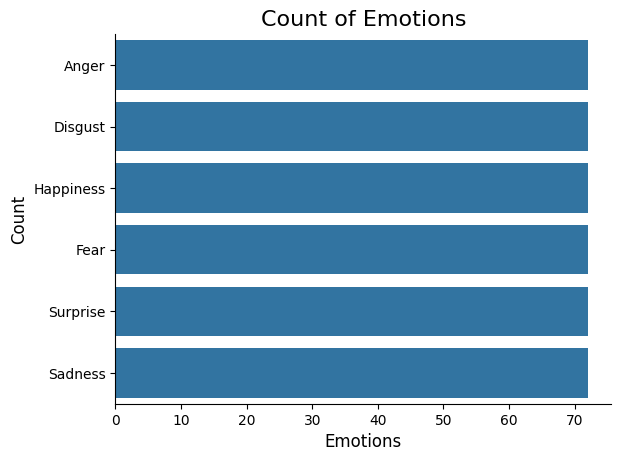

In [32]:
plt.title('Count of Emotions', size=16)
sns.countplot(data_path.emotion)
plt.ylabel('Count', size=12)
plt.xlabel('Emotions', size=12)
sns.despine(top=True, right=True, left=False, bottom=False)
plt.show()

In [33]:
def create_waveplot(data, sr, e):
    plt.figure(figsize=(10, 3))
    plt.title('Waveplot for audio with {} emotion'.format(e), size=15)
    librosa.display.waveplot(data, sr=sr)
    plt.show()

def create_spectrogram(data, sr, e):
    # stft function converts the data into short term fourier transform
    X = librosa.stft(data)
    Xdb = librosa.amplitude_to_db(abs(X))
    plt.figure(figsize=(12, 3))
    plt.title('Spectrogram for audio with {} emotion'.format(e), size=15)
    librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz')
    #librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='log')
    plt.colorbar()

In [34]:
def noise(data):
    noise_amp = 0.035*np.random.uniform()*np.amax(data)
    data = data + noise_amp*np.random.normal(size=data.shape[0])
    return data

def stretch(data, rate=0.8):
    return librosa.effects.time_stretch(y=data, rate=rate)

def shift(data):
    shift_range = int(np.random.uniform(low=-5, high = 5)*1000)
    return np.roll(data, shift_range)

def pitch(data, sampling_rate, pitch_factor=0.7):
    return librosa.effects.pitch_shift(y=data,sr=sampling_rate,n_steps=pitch_factor)

# taking any example and checking for techniques.
path = np.array(data_path.path)[1]
data, sample_rate = librosa.load(path)

In [35]:
def extract_features(data):
    # ZCR
    result = np.array([])
    zcr = np.mean(librosa.feature.zero_crossing_rate(y=data).T, axis=0)
    result=np.hstack((result, zcr)) # stacking horizontally

    # Chroma_stft
    stft = np.abs(librosa.stft(data))
    chroma_stft = np.mean(librosa.feature.chroma_stft(S=stft, sr=sample_rate).T, axis=0)
    result = np.hstack((result, chroma_stft)) # stacking horizontally

    # MFCC
    mfcc = np.mean(librosa.feature.mfcc(y=data, sr=sample_rate,n_mfcc=13).T, axis=0)
    result = np.hstack((result, mfcc)) # stacking horizontally

    # Root Mean Square Value
    rms = np.mean(librosa.feature.rms(y=data).T, axis=0)
    result = np.hstack((result, rms)) # stacking horizontally

    # MelSpectogram
    mel = np.mean(librosa.feature.melspectrogram(y=data, sr=sample_rate).T, axis=0)
    result = np.hstack((result, mel)) # stacking horizontally

    return result

In [36]:
def get_features(path):
    # duration and offset are used to take care of the no audio in start and the ending of each audio files as seen above.
    data, sample_rate = librosa.load(path, duration=2.5, offset=0.6)
    result = np.array([])

    # without augmentation
    res1 = extract_features(data)
    result = np.array(res1)

    # data with noise
    noise_data = noise(data)
    res2 = extract_features(noise_data)
    result = np.vstack((result, res2)) # stacking vertically

    # data with stretching and pitching
    new_data = stretch(data)
    data_stretch_pitch = pitch(new_data, sample_rate)
    res3 = extract_features(data_stretch_pitch)
    result = np.vstack((result, res3)) # stacking vertically

    return result

In [37]:
X, Y = [], []
for path, emotion in zip(df.path, df.emotion):
    feature = get_features(path)
    for ele in feature:
        X.append(ele)
        # appending emotion 3 times as we have made 3 augmentation techniques on each audio file.
        Y.append(emotion)

In [38]:
len(X), len(Y), data_path.path.shape

(1296, 1296, (432,))

In [39]:
Features = pd.DataFrame(X)
Features['labels'] = Y
Features.to_csv('features.csv', index=False)
Features.head()

,0,1,2,3,4,5,6,7,8,9,...,146,147,148,149,150,151,152,153,154,labels
0,0.162733,0.770980,0.763266,0.759309,0.769838,0.759785,0.775663,0.779117,0.815968,0.837668,...,0.000008,0.000006,0.000008,0.000011,0.000013,0.000024,0.000054,0.000029,1.551530e-06,Anger
1,0.383409,0.842703,0.872374,0.879702,0.890517,0.900602,0.829481,0.746166,0.770699,0.808282,...,0.000246,0.000242,0.000251,0.000243,0.000253,0.000265,0.000294,0.000276,2.464260e-04,Anger
2,0.146474,0.761366,0.733754,0.720276,0.718450,0.687858,0.659795,0.727576,0.745391,0.747492,...,0.000002,0.000001,0.000002,0.000001,0.000002,0.000003,0.000004,0.000003,3.962650e-07,Anger
3,0.145973,0.679724,0.687997,0.766341,0.730137,0.670197,0.621545,0.594368,0.620839,0.657737,...,0.000145,0.000169,0.000152,0.000164,0.000207,0.000168,0.000114,0.000075,6.883107e-06,Anger
4,0.248038,0.691149,0.742446,0.817053,0.759259,0.724298,0.657367,0.632612,0.638129,0.660917,...,0.000152,0.000176,0.000160,0.000172,0.000211,0.000172,0.000123,0.000084,1.476125e-05,Anger


In [40]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

X = Features.iloc[: ,:-1].values
Y = Features['labels'].values
x_train, x_test, y_train, y_test = train_test_split(X, Y,test_size=0.20, random_state=0, shuffle=True)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

# NORMALIZE DATA
mean = np.mean(x_train, axis=0)
std = np.std(x_train, axis=0)
x_train = (x_train - mean)/std
x_test = (x_test - mean)/std

# TURN DATA INTO ARRAYS FOR KERAS
x_train = np.array(x_train)
y_train = np.array(y_train)
x_test = np.array(x_test)
y_test = np.array(y_test)
# ONE HOT ENCODE THE TARGET
# CNN REQUIRES INPUT AND OUTPUT ARE NUMBERS
lb = LabelEncoder()
y_train = to_categorical(lb.fit_transform(y_train))
y_test = to_categorical(lb.fit_transform(y_test))
print(y_test[0:10])
# RESHAPE DATA TO INCLUDE 3D TENSOR
x_train = x_train[:,:,np.newaxis]
x_test = x_test[:,:,np.newaxis]

print(x_train.shape)
print(x_test.shape)

# Define the K-fold Cross Validator
kfold = KFold(n_splits=2, shuffle=True)
acc_per_fold = []
loss_per_fold = []
inputs = np.concatenate((x_train, x_test), axis=0)
targets = np.concatenate((y_train, y_test), axis=0)
inputs.shape
targets.shape

[[0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 1.]
 [0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0.]
 [0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0. 0.]]
(1036, 155, 1)
(260, 155, 1)


(1296, 6)

In [41]:
lb.classes_

array(['Anger', 'Disgust', 'Fear', 'Happiness', 'Sadness', 'Surprise'],
      dtype=object)

In [42]:
#Accuarte class labels

In [43]:
data_path = pd.concat([df], axis = 0)
data_path.to_csv("data_path.csv",index=False)
data_path.head(50)

,emotion,path,0,1,2,3,4,5,6,7,...,249,250,251,252,253,254,255,256,257,258
0,Anger,/content/drive/MyDrive/Dataset/Datasets/CaFE/Colère/Faible/01-C-1-1.aiff,-74.355324,-73.725685,-73.624619,-73.574707,-73.725983,-73.569580,-74.066902,-73.906906,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Anger,/content/drive/MyDrive/Dataset/Datasets/CaFE/Colère/Faible/01-C-1-2.aiff,-69.526566,-69.181915,-69.113907,-69.245872,-69.171524,-69.065559,-69.157578,-69.088799,...,-25.900444,-25.501810,-25.328730,-25.043015,-26.163950,-27.037634,-28.943907,-34.345955,-41.520523,-42.038826
2,Anger,/content/drive/MyDrive/Dataset/Datasets/CaFE/Colère/Faible/01-C-1-3.aiff,-72.700844,-72.506721,-72.311539,-72.220306,-72.266212,-72.288177,-72.439278,-72.482231,...,-38.701180,-41.500946,-45.431301,-54.741261,-59.676331,-61.973759,-63.914291,-65.528496,-67.224731,-68.872673
3,Anger,/content/drive/MyDrive/Dataset/Datasets/CaFE/Colère/Faible/01-C-1-4.aiff,-64.053192,-64.182007,-64.619278,-64.880699,-64.600967,-64.190544,-64.214851,-64.361687,...,-55.985008,-56.033882,-55.948242,-56.508011,-56.365566,-56.568123,-56.656307,-56.408882,-56.664394,-57.591312
4,Anger,/content/drive/MyDrive/Dataset/Datasets/CaFE/Colère/Faible/01-C-1-5.aiff,-73.076263,-72.974205,-73.104607,-73.092163,-73.095634,-73.250839,-73.181442,-72.227661,...,-59.269444,-58.565208,-57.897930,-58.891647,-59.606617,-59.319107,-59.525188,-60.196270,-60.577671,-61.757462
5,Anger,/content/drive/MyDrive/Dataset/Datasets/CaFE/Colère/Faible/01-C-1-6.aiff,-69.427879,-69.294830,-69.374893,-69.425400,-69.521706,-69.274178,-69.375557,-69.511826,...,-69.040794,-68.895248,-69.105255,-69.111122,-69.122528,-69.179344,-69.226707,-69.230988,-69.325340,-69.232750
6,Anger,/content/drive/MyDrive/Dataset/Datasets/CaFE/Colère/Faible/02-C-1-1.aiff,-52.039253,-51.899738,-51.850708,-51.848854,-51.954288,-52.061153,-51.997089,-51.986115,...,-10.058106,-6.488938,-4.252918,-3.968101,-5.853641,-5.905989,-5.204469,-7.960146,-11.137462,-12.116163
7,Anger,/content/drive/MyDrive/Dataset/Datasets/CaFE/Colère/Faible/02-C-1-2.aiff,-52.919876,-52.645348,-52.717350,-53.054340,-53.117039,-53.024376,-53.123138,-53.102737,...,-53.007992,-53.068275,-46.867153,-41.664337,-42.649826,-45.861752,-50.686356,-52.773907,-52.840687,-52.908577
8,Anger,/content/drive/MyDrive/Dataset/Datasets/CaFE/Colère/Faible/02-C-1-3.aiff,-53.423775,-52.789558,-52.564014,-52.320400,-52.083473,-52.192440,-52.138065,-52.490719,...,-28.076176,-30.961079,-29.578217,-29.315495,-31.110378,-31.640959,-31.958437,-32.113991,-29.331388,-25.206619
9,Anger,/content/drive/MyDrive/Dataset/Datasets/CaFE/Colère/Faible/02-C-1-4.aiff,-69.100357,-68.849594,-68.952759,-69.070999,-69.255615,-69.013931,-68.887009,-69.138580,...,-21.776747,-21.140005,-21.942684,-23.225246,-24.596819,-25.666700,-26.735941,-27.912607,-28.791164,-30.293627


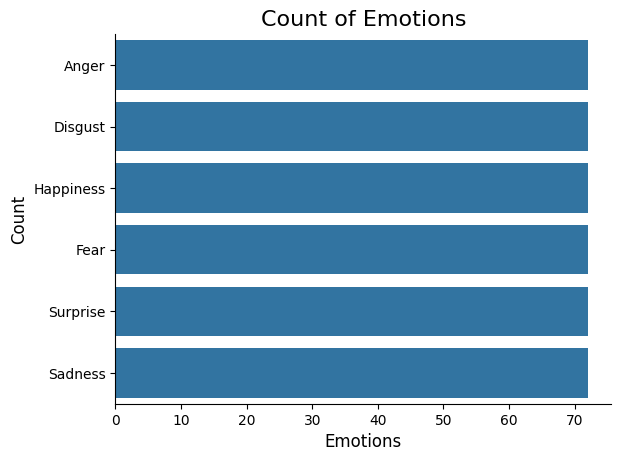

In [44]:
plt.title('Count of Emotions', size=16)
sns.countplot(data_path.emotion)
plt.ylabel('Count', size=12)
plt.xlabel('Emotions', size=12)
sns.despine(top=True, right=True, left=False, bottom=False)
plt.show()

In [45]:
def create_waveplot(data, sr, e):
    plt.figure(figsize=(10, 3))
    plt.title('Waveplot for audio with {} emotion'.format(e), size=15)
    librosa.display.waveplot(data, sr=sr)
    plt.show()

def create_spectrogram(data, sr, e):
    # stft function converts the data into short term fourier transform
    X = librosa.stft(data)
    Xdb = librosa.amplitude_to_db(abs(X))
    plt.figure(figsize=(12, 3))
    plt.title('Spectrogram for audio with {} emotion'.format(e), size=15)
    librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz')
    #librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='log')
    plt.colorbar()

In [46]:
def noise(data):
    noise_amp = 0.015*np.random.uniform()*np.amax(data)
    data = data + noise_amp*np.random.normal(size=data.shape[0])
    return data

def stretch(data, rate=0.8):
    return librosa.effects.time_stretch(y=data,rate=rate)

def shift(data):
    shift_range = int(np.random.uniform(low=-5, high = 5)*1000)
    return np.roll(data, shift_range)

def pitch(data, sampling_rate, pitch_factor=0.7):
    return librosa.effects.pitch_shift(y=data,sr=sampling_rate,n_steps=pitch_factor)

def pitch2(data, sampling_rate, pitch_factor=0.6):
    return librosa.effects.pitch_shift(y=data,sr=sampling_rate,n_steps=pitch_factor)

# taking any example and checking for techniques.
path = np.array(data_path.path)[1]
data, sample_rate = librosa.load(path)

In [47]:
def extract_features(data):
    # ZCR
    result = np.array([])
    zcr = np.mean(librosa.feature.zero_crossing_rate(y=data).T, axis=0)
    result=np.hstack((result, zcr)) # stacking horizontally

    # Chroma_stft
    stft = np.abs(librosa.stft(data))
    chroma_stft = np.mean(librosa.feature.chroma_stft(S=stft, sr=sample_rate).T, axis=0)
    result = np.hstack((result, chroma_stft)) # stacking horizontally

    # MFCC
    mfcc = np.mean(librosa.feature.mfcc(y=data, sr=sample_rate,n_mfcc=13).T, axis=0)
    result = np.hstack((result, mfcc)) # stacking horizontally

    # Root Mean Square Value
    rms = np.mean(librosa.feature.rms(y=data).T, axis=0)
    result = np.hstack((result, rms)) # stacking horizontally

    # MelSpectogram
    mel = np.mean(librosa.feature.melspectrogram(y=data, sr=sample_rate).T, axis=0)
    result = np.hstack((result, mel)) # stacking horizontally

    return result

In [48]:
def get_features(path):
    # duration and offset are used to take care of the no audio in start and the ending of each audio files as seen above.
    data, sample_rate = librosa.load(path, duration=2.5, offset=0.6)
    result = np.array([])

    # without augmentation
    res1 = extract_features(data)
    result = np.array(res1)

    # data with noise
    noise_data = noise(data)
    res2 = extract_features(noise_data)
    result = np.vstack((result, res2)) # stacking vertically

    # data with stretching and pitching
    new_data = stretch(data)
    data_stretch_pitch = pitch(new_data, sample_rate)
    res3 = extract_features(data_stretch_pitch)
    result = np.vstack((result, res3)) # stacking vertically

    # data with stretching and pitching
    new_data = stretch(data)
    data_stretch_pitch = pitch2(new_data, sample_rate)
    res4 = extract_features(data_stretch_pitch)
    result = np.vstack((result, res4)) # stacking vertically

    return result

In [49]:
X, Y = [], []
for path, emotion in zip(df.path, df.emotion):
    feature = get_features(path)
    for ele in feature:
        X.append(ele)
        # appending emotion 3 times as we have made 3 augmentation techniques on each audio file.
        Y.append(emotion)

In [50]:
len(X), len(Y), data_path.path.shape

(1728, 1728, (432,))

In [51]:
Features = pd.DataFrame(X)
Features['labels'] = Y
Features.to_csv('features.csv', index=False)
Features.head()

,0,1,2,3,4,5,6,7,8,9,...,146,147,148,149,150,151,152,153,154,labels
0,0.162733,0.770980,0.763266,0.759309,0.769838,0.759785,0.775663,0.779117,0.815968,0.837668,...,0.000008,0.000006,0.000008,0.000011,0.000013,0.000024,0.000054,0.000029,1.551530e-06,Anger
1,0.331100,0.805033,0.815755,0.842190,0.853125,0.835426,0.751705,0.744128,0.780041,0.814515,...,0.000024,0.000022,0.000025,0.000027,0.000030,0.000041,0.000071,0.000043,1.733803e-05,Anger
2,0.146474,0.761366,0.733754,0.720276,0.718450,0.687858,0.659795,0.727576,0.745391,0.747492,...,0.000002,0.000001,0.000002,0.000001,0.000002,0.000003,0.000004,0.000003,3.962650e-07,Anger
3,0.144965,0.713468,0.731557,0.740096,0.752063,0.690011,0.698942,0.709971,0.740269,0.806843,...,0.000001,0.000001,0.000001,0.000002,0.000002,0.000003,0.000004,0.000005,5.450110e-07,Anger
4,0.145973,0.679724,0.687997,0.766341,0.730137,0.670197,0.621545,0.594368,0.620839,0.657737,...,0.000145,0.000169,0.000152,0.000164,0.000207,0.000168,0.000114,0.000075,6.883107e-06,Anger


In [52]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

X = Features.iloc[: ,:-1].values
Y = Features['labels'].values
x_train, x_test, y_train, y_test = train_test_split(X, Y,test_size=0.20, random_state=0, shuffle=True)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

# NORMALIZE DATA
mean = np.mean(x_train, axis=0)
std = np.std(x_train, axis=0)
x_train = (x_train - mean)/std
x_test = (x_test - mean)/std

# TURN DATA INTO ARRAYS FOR KERAS
x_train = np.array(x_train)
y_train = np.array(y_train)
x_test = np.array(x_test)
y_test = np.array(y_test)
# ONE HOT ENCODE THE TARGET
# CNN REQUIRES INPUT AND OUTPUT ARE NUMBERS
lb = LabelEncoder()
y_train = to_categorical(lb.fit_transform(y_train))
y_test = to_categorical(lb.fit_transform(y_test))
print(y_test[0:10])
# RESHAPE DATA TO INCLUDE 3D TENSOR
x_train = x_train[:,:,np.newaxis]
x_test = x_test[:,:,np.newaxis]

print(x_train.shape)
print(x_test.shape)

# Define the K-fold Cross Validator
kfold = KFold(n_splits=2, shuffle=True)
acc_per_fold = []
loss_per_fold = []
inputs = np.concatenate((x_train, x_test), axis=0)
targets = np.concatenate((y_train, y_test), axis=0)
inputs.shape
targets.shape



[[0. 0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0.]
 [1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0. 0.]]
(1382, 155, 1)
(346, 155, 1)


(1728, 6)

In [53]:
lb.classes_

array(['Anger', 'Disgust', 'Fear', 'Happiness', 'Sadness', 'Surprise'],
      dtype=object)

In [54]:
import random
#########################################################################
### Model average / sum Ensemble
# Simple sum of all outputs / predictions and argmax across all classes
########
from keras.models import load_model
from sklearn.metrics import accuracy_score

model1 = load_model('/content/drive/MyDrive/Dataset/models/german_models/model1-emo-db.weights.h5')
model2 = load_model('/content/drive/MyDrive/Dataset/models/german_models/model2-emo-db.weights.h5')
model3 = load_model('/content/drive/MyDrive/Dataset/models/german_models/model3-emo-db.weights.h5')

models = [model1, model2, model3]

preds = [model.predict(x_test) for model in models]
preds=np.array(preds)
summed = np.sum(preds, axis=0)

# argmax across classes
ensemble_prediction = np.argmax(summed, axis=1)

prediction1 = np.argmax(model1.predict(x_test), axis=1)
prediction2 = np.argmax(model2.predict(x_test), axis=1)
prediction3 = np.argmax(model3.predict(x_test), axis=1)

accuracy1 = accuracy_score(np.argmax(y_test, axis=1), prediction1)
accuracy2 = accuracy_score(np.argmax(y_test, axis=1), prediction2)
accuracy3 = accuracy_score(np.argmax(y_test, axis=1), prediction3)
ensemble_accuracy = accuracy_score(np.argmax(y_test, axis=1), ensemble_prediction)

print('Accuracy Score for model1 = ', accuracy1)
print('Accuracy Score for model2 = ', accuracy2)
print('Accuracy Score for model3 = ', accuracy3)
print('Accuracy Score for average ensemble = ', ensemble_accuracy)

########################################
#Weighted average ensemble
models = [model1, model2, model3]
preds = [model.predict(x_test) for model in models]
preds=np.array(preds)
weights = [0.4, 0.2, 0.4]

#Use tensordot to sum the products of all elements over specified axes.
weighted_preds = np.tensordot(preds, weights, axes=((0),(0)))
weighted_ensemble_prediction = np.argmax(weighted_preds, axis=1)

weighted_accuracy = accuracy_score(np.argmax(y_test, axis=1), weighted_ensemble_prediction)
print('Weighted average method')
print('Accuracy Score for model1 = ', accuracy1)
print('Accuracy Score for model2 = ', accuracy2)
print('Accuracy Score for model3 = ', accuracy3)
print('Accuracy Score for average ensemble = ', ensemble_accuracy)
print('Accuracy Score for weighted average ensemble = ', weighted_accuracy)

########################################
#Grid search for the best combination of w1, w2, w3 that gives maximum acuracy
models = [model1, model2, model3]
preds1 = [model.predict(x_test) for model in models]
preds1=np.array(preds1)

import pandas as pd
df = pd.DataFrame([])

for w1 in range(0, 5):
    for w2 in range(0,5):
        for w3 in range(0,5):
            wts = [w1/10.,w2/10.,w3/10.]
            wted_preds1 = np.tensordot(preds1, wts, axes=((0),(0)))
            wted_ensemble_pred = np.argmax(wted_preds1, axis=1)
            weighted_accuracy = accuracy_score(np.argmax(y_test, axis=1), wted_ensemble_pred)
            df = pd.concat([df, pd.DataFrame({'wt1':wts[0],'wt2':wts[1],
                                         'wt3':wts[2], 'acc':weighted_accuracy*100}, index=[0])], ignore_index=True)

max_acc_row = df.iloc[df['acc'].idxmax()]
print("Max accuracy of ", max_acc_row[3], " obained with w1=", max_acc_row[0],
      " w2=", max_acc_row[1], " and w3=", max_acc_row[2])




###########################################################################
### Explore metrics for the ideal weighted ensemble model.

models = [model1, model2, model3]
preds = [model.predict(x_test) for model in models]
preds=np.array(preds)
ideal_weights = [0.4, 0.1, 0.2]

#Use tensordot to sum the products of all elements over specified axes.
ideal_weighted_preds = np.tensordot(preds, ideal_weights, axes=((0),(0)))
ideal_weighted_ensemble_prediction = np.argmax(ideal_weighted_preds, axis=1)

ideal_weighted_accuracy = accuracy_score(np.argmax(y_test, axis=1), ideal_weighted_ensemble_prediction)



from sklearn.metrics import confusion_matrix
import seaborn as sns
#Print confusion matrix
cm = confusion_matrix(np.argmax(y_test, axis=1), ideal_weighted_ensemble_prediction)
cm = pd.DataFrame(cm , index = [i for i in lb.classes_] , columns = [i for i in lb.classes_])

fig, ax = plt.subplots(figsize=(12,12))
sns.set(font_scale=1.6)
sns.heatmap(cm, annot=True, linewidths=.5, ax=ax)


# CREATE CONFUSION MATRIX OF ACTUAL VS. PREDICTION -SGD-MFCC
cm = confusion_matrix(np.argmax(y_test, axis=1), ideal_weighted_ensemble_prediction)
plt.figure(figsize = (9,7))
plt.rcParams['figure.dpi'] = 125
cm = pd.DataFrame(cm , index = [i for i in lb.classes_] , columns = [i for i in lb.classes_])
ax = sns.heatmap(cm, linecolor='white', cmap='Accent', linewidth=1, annot=True, fmt='')
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.6, top - 0.6)
plt.title('Confusion Matrix', size=20)
plt.xlabel('Predicted Classes', size=15)
plt.ylabel('True Classes', size=15)
plt.savefig('emo-db-model-2.png')
plt.show()

11/11 ━━━━━━━━━━━━━━━━━━━━ 3s 185ms/step
11/11 ━━━━━━━━━━━━━━━━━━━━ 4s 278ms/step
11/11 ━━━━━━━━━━━━━━━━━━━━ 3s 200ms/step
11/11 ━━━━━━━━━━━━━━━━━━━━ 2s 147ms/step
11/11 ━━━━━━━━━━━━━━━━━━━━ 2s 151ms/step
11/11 ━━━━━━━━━━━━━━━━━━━━ 2s 151ms/step
Accuracy Score for model1 =  0.19653179190751446
Accuracy Score for model2 =  0.15895953757225434
Accuracy Score for model3 =  0.17052023121387283
Accuracy Score for average ensemble =  0.19653179190751446
11/11 ━━━━━━━━━━━━━━━━━━━━ 3s 235ms/step
11/11 ━━━━━━━━━━━━━━━━━━━━ 3s 260ms/step
11/11 ━━━━━━━━━━━━━━━━━━━━ 2s 149ms/step
Weighted average method
Accuracy Score for model1 =  0.19653179190751446
Accuracy Score for model2 =  0.15895953757225434
Accuracy Score for model3 =  0.17052023121387283
Accuracy Score for average ensemble =  0.19653179190751446
Accuracy Score for weighted average ensemble =  0.21098265895953758
11/11 ━━━━━━━━━━━━━━━━━━━━ 2s 147ms/step
11/11 ━━━━━━━━━━━━━━━━━━━━ 2s 166ms/step
11/11 ━━━━━━━━━━━━━━━━━━━━ 2s 192ms/step
Max 

ValueError: Shape of passed values is (7, 7), indices imply (6, 6)

In [ ]:
#Weighted average ensemble
models = [model1, model2, model3]
preds = [model.predict(x_test) for model in models]
preds=np.array(preds)
weights = [0.3, 0.1, 0.3]

#Use tensordot to sum the products of all elements over specified axes.
weighted_preds = np.tensordot(preds, weights, axes=((0),(0)))
weighted_ensemble_prediction = np.argmax(weighted_preds, axis=1)

weighted_accuracy = accuracy_score(np.argmax(y_test, axis=1), weighted_ensemble_prediction)
print('Weighted average method')
print('Accuracy Score for model1 = ', accuracy1)
print('Accuracy Score for model2 = ', accuracy2)
print('Accuracy Score for model3 = ', accuracy3)
print('Accuracy Score for average ensemble = ', ensemble_accuracy)
print('Accuracy Score for weighted average ensemble = ', weighted_accuracy)


from sklearn.metrics import confusion_matrix
import seaborn as sns
#Print confusion matrix
cm = confusion_matrix(np.argmax(y_test, axis=1), ideal_weighted_ensemble_prediction)
cm = pd.DataFrame(cm , index = [i for i in lb.classes_] , columns = [i for i in lb.classes_])

fig, ax = plt.subplots(figsize=(12,12))
sns.set(font_scale=1.6)
sns.heatmap(cm, annot=True, linewidths=.5, ax=ax)

# CREATE CONFUSION MATRIX OF ACTUAL VS. PREDICTION -SGD-MFCC
cm = confusion_matrix(np.argmax(y_test, axis=1), ideal_weighted_ensemble_prediction)
plt.figure(figsize = (9,7))
plt.rcParams['figure.dpi'] = 125
cm = pd.DataFrame(cm , index = [i for i in lb.classes_] , columns = [i for i in lb.classes_])
ax = sns.heatmap(cm, linecolor='white', cmap='Accent', linewidth=1, annot=True, fmt='')
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.6, top - 0.6)
plt.title('Confusion Matrix', size=20)
plt.xlabel('Predicted Classes', size=15)
plt.ylabel('True Classes', size=15)
plt.savefig('SAVEE-EMSEMBLE.png')
plt.show()